Analysis:
1>More Cities towards North pole than South pole
2>Lot of cities with High Humidity North and South of the equator, big spectrum even though the temperature varies
3>This time of the year more cities with clear skies and less wind

In [1]:
#import statements 
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy
import openweathermapy.core as ow 
import numpy as np
import  urllib
from config import api_key
from datetime import datetime

In [2]:
#get 2000 uniform longtitude and latitude values 
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)

# get city list using above lat and long values via citipy.nearest_city
cities_list = []

for x in range(len(lats)):
    city = citipy.nearest_city(lats[x], lngs[x])
    if city.city_name not in cities_list:
        cities_list.append(city.city_name)
        


In [3]:
#for  openweathermapy set static URL settings
settings = {"units": "imperial", "appid": api_key}

#loop through cities to get weather for 500 cities using openweathermapy

weather_data = []

print("Begining Data Retrieval")
print("=======================")
for key,city in enumerate(cities_list):
    try:
        print(f'Processing Record {key} | {city}')
        weather_data.append(ow.get_current(city, **settings))
        if (len(weather_data) == 500):
           break
    #if weather for city not found skip city and process next city
    except urllib.error.HTTPError as e:
        print("Weather for City " + city + " Not Found")
        continue
print("=======================")
print("Data Retrieval Complete")
print("=======================")

Begining Data Retrieval
Processing Record 0 | ushuaia
Processing Record 1 | nishihara
Processing Record 2 | udachnyy
Processing Record 3 | nadym
Processing Record 4 | tasiilaq
Processing Record 5 | zaozerne
Processing Record 6 | mataura
Processing Record 7 | norman wells
Processing Record 8 | naryan-mar
Processing Record 9 | wadi musa
Processing Record 10 | bethel
Processing Record 11 | avarua
Processing Record 12 | terrace bay
Processing Record 13 | conde
Processing Record 14 | qaanaaq
Processing Record 15 | atuona
Processing Record 16 | vaini
Processing Record 17 | hithadhoo
Processing Record 18 | amderma
Weather for City amderma Not Found
Processing Record 19 | rikitea
Processing Record 20 | nanortalik
Processing Record 21 | yellowknife
Processing Record 22 | kalengwa
Processing Record 23 | murgab
Processing Record 24 | souillac
Processing Record 25 | bluff
Processing Record 26 | yeppoon
Processing Record 27 | muriwai beach
Processing Record 28 | samarai
Processing Record 29 | puert

Processing Record 221 | omboue
Processing Record 222 | isangel
Processing Record 223 | taoudenni
Processing Record 224 | tura
Processing Record 225 | synya
Processing Record 226 | ulaangom
Processing Record 227 | padang
Processing Record 228 | lima
Processing Record 229 | marzuq
Processing Record 230 | limulunga
Processing Record 231 | bundaberg
Processing Record 232 | flin flon
Processing Record 233 | blagoyevo
Processing Record 234 | torbay
Processing Record 235 | miquelon
Processing Record 236 | high level
Processing Record 237 | nizhneyansk
Weather for City nizhneyansk Not Found
Processing Record 238 | victoria
Processing Record 239 | tivaouane
Processing Record 240 | bur gabo
Weather for City bur gabo Not Found
Processing Record 241 | asau
Weather for City asau Not Found
Processing Record 242 | waipawa
Processing Record 243 | tumannyy
Weather for City tumannyy Not Found
Processing Record 244 | sanchez
Processing Record 245 | millerovo
Processing Record 246 | tapaua
Weather for Cit

Processing Record 441 | salamanca
Processing Record 442 | arak
Processing Record 443 | saint-louis
Processing Record 444 | pak phanang
Processing Record 445 | vrangel
Processing Record 446 | fomboni
Processing Record 447 | mbale
Processing Record 448 | morondava
Processing Record 449 | manta
Processing Record 450 | praia da vitoria
Processing Record 451 | zhanaozen
Processing Record 452 | grindavik
Processing Record 453 | totness
Processing Record 454 | ferrol
Processing Record 455 | koygorodok
Processing Record 456 | canyon lake
Processing Record 457 | ochamchira
Processing Record 458 | sao joao da barra
Processing Record 459 | torbat-e jam
Processing Record 460 | fort saint james
Processing Record 461 | adrar
Processing Record 462 | pemberton
Processing Record 463 | kilrush
Processing Record 464 | saraj
Processing Record 465 | toccoa
Processing Record 466 | santa lucia
Processing Record 467 | euclides da cunha
Processing Record 468 | amravati
Processing Record 469 | grand gaube
Proce

In [4]:
#using openweathermapy retrieve listed dictionary attributes
summary = ["name","clouds.all", "sys.country", "dt","main.humidity","coord.lat","coord.lon","main.temp_max","wind.speed"]

data = [response(*summary) for response in weather_data]



In [5]:
# Create a Pandas DataFrame with the results
column_names = ["City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"]

df_weather_data = pd.DataFrame(data,  columns=column_names)

df_weather_data.count()



City          500
Cloudiness    500
Country       500
Date          500
Humidity      500
Lat           500
Lng           500
Max Temp      500
Wind Speed    500
dtype: int64

In [6]:

df_weather_data.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ushuaia,75,AR,1516485600,43,-54.81,-68.31,55.40,18.34
1,Nishihara,1,JP,1516486140,86,35.74,139.53,42.80,3.65
2,Udachnyy,68,RU,1516487895,61,66.42,112.40,-21.29,8.01
3,Nadym,0,RU,1516487896,0,65.53,72.51,-40.37,7.23
4,Tasiilaq,56,GL,1516485000,38,65.61,-37.64,26.60,16.11


In [7]:
df_weather_data.to_csv("WeatherData.csv", encoding='utf-8',index=False)

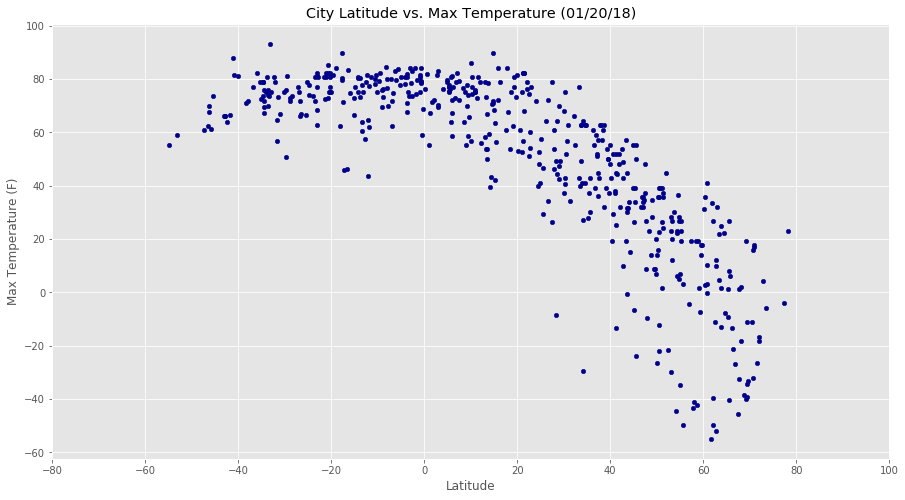

In [8]:
dt_display = datetime.today().strftime("%m/%d/%y")
plt.style.use('ggplot') 
df_weather_data.plot(kind="scatter",x="Lat",y="Max Temp",color="darkBlue",figsize=(15,8))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(-80,100)
plt.title("City Latitude vs. Max Temperature (" + dt_display  + ")")
plt.savefig("City_Lat_vs_Max_tmp.png")
plt.show()

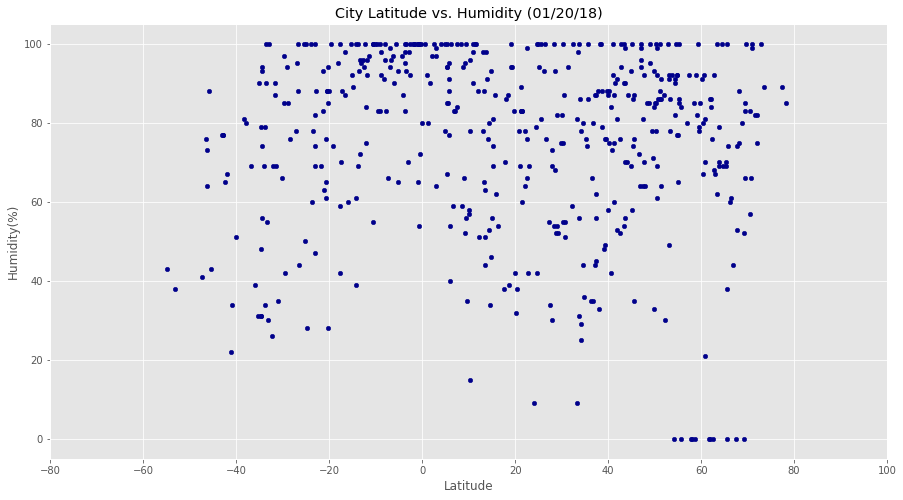

In [9]:
plt.style.use('ggplot') 
df_weather_data.plot(kind="scatter",x="Lat",y="Humidity",color="darkBlue",figsize=(15,8))
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.xlim(-80,100)
plt.title("City Latitude vs. Humidity (" + dt_display + ")")
plt.savefig("City_Lat_vs_Humidity.png")
plt.show()

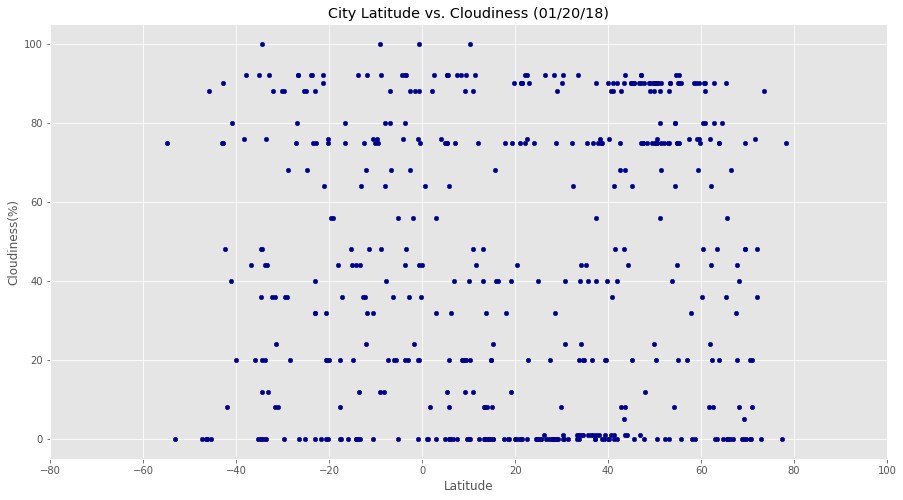

In [10]:
plt.style.use('ggplot') 
df_weather_data.plot(kind="scatter",x="Lat",y="Cloudiness",color="darkBlue",figsize=(15,8))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.xlim(-80,100)
plt.title("City Latitude vs. Cloudiness (" + dt_display + ")")
plt.savefig("City_Lat_vs_Cloudiness.png")
plt.show()

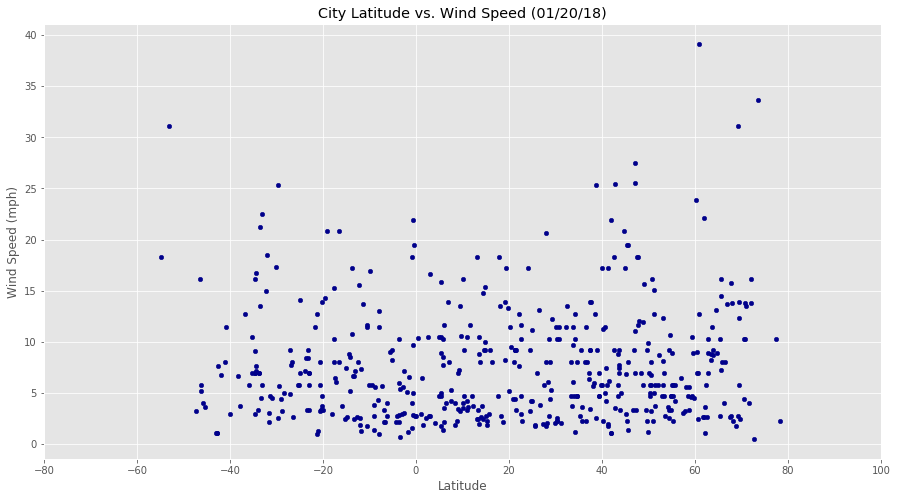

In [11]:
df_weather_data.plot(kind="scatter",x="Lat",y="Wind Speed",color="darkBlue",figsize=(15,8))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-80,100)
plt.title("City Latitude vs. Wind Speed (" + dt_display + ")")
plt.savefig("City_Lat_vs_Wind_Speed.png")
plt.show()